### GMM 을 이용한 붓꽃 데이터 셋 클러스터링

### 비지도 학습: 가우시안 혼합 모델 (GMM)
1. 개요
가우시안 혼합 모델(Gaussian Mixture Model, GMM)은 데이터를 여러 개의 가우시안 분포가 혼합된 모델로 설명하는 방법입니다. 이는 데이터가 여러 개의 가우시안 분포를 가진 클러스터들로 구성되어 있다는 가정하에 진행됩니다.

2. 가우시안 혼합 모델의 구성
가우시안 혼합 모델은 여러 개의 가우시안 분포를 가진 컴포넌트들로 구성됩니다. 각 컴포넌트는 다음과 같은 요소들로 구성됩니다:

- 가우시안 분포: 각 컴포넌트는 가우시안 분포를 가집니다. 이 분포는 평균과 분산으로 정의됩니다.

- 혼합 가중치: 각 컴포넌트는 혼합 가중치를 가집니다. 이는 해당 컴포넌트가 전체 모델에서 차지하는 비율을 나타냅니다. 모든 컴포넌트의 혼합 가중치의 합은 1입니다.

3. 가우시안 혼합 모델의 학습
가우시안 혼합 모델의 학습은 기대값 최대화 알고리즘(Expectation-Maximization, EM)을 사용하여 진행됩니다. 이 알고리즘은 다음 두 단계를 반복하여 수행됩니다:

기대 단계(E-step): 현재의 모델 파라미터를 사용하여, 각 데이터 포인트가 각 컴포넌트에 속할 확률을 계산합니다.

최대화 단계(M-step): E-step에서 계산된 확률을 사용하여, 모델의 파라미터를 업데이트합니다.

이 과정을 반복하면서 모델의 파라미터가 수렴할 때까지 학습을 진행합니다.

4. 가우시안 혼합 모델의 활용
가우시안 혼합 모델은 다양한 분야에서 활용됩니다. 예를 들어, 이미지 처리에서는 픽셀의 분포를 모델링하거나, 음성 인식에서는 음향 신호의 분포를 모델링하는 데 사용됩니다. 또한, 금융 분야에서는 주식 가격의 변동을 모델링하는 데 사용되기도 합니다.

5

6. 가우시안 혼합 모델의 시각화
다음 그래프는 두 개의 가우시안 분포를 혼합하여 만든 가우시안 혼합 모델을 시각화한 것입니다. x와 y는 입력 변수를, PDF는 해당 위치에서의 확률 밀도 함수의 값을 나타냅니다.

Gaussian Mixture Model
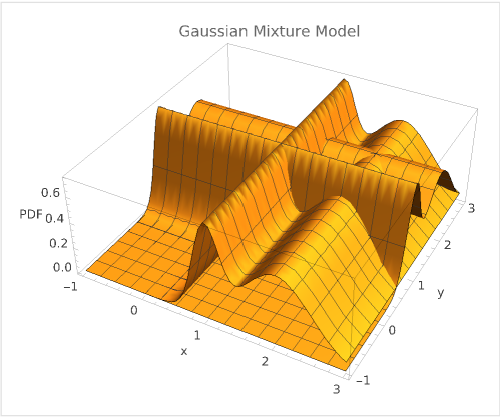

이 그래프에서 볼 수 있듯이, 가우시안 혼합 모델은 입력 공간을 여러 개의 가우시안 분포로 나누어 설명합니다. 이를 통해 복잡한 데이터 분포를 효과적으로 모델링할 수 있습니다.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

### GMM과 K-평균의 비교

In [ ]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [ ]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [ ]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

In [ ]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [ ]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())